# Simulated Annealing Experiment

In [17]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.simulated_annealing import simulated_annealing


Running Simulated Annealing on Small Dataset
Small Graph Loaded
Nodes: 11
Edges: 20


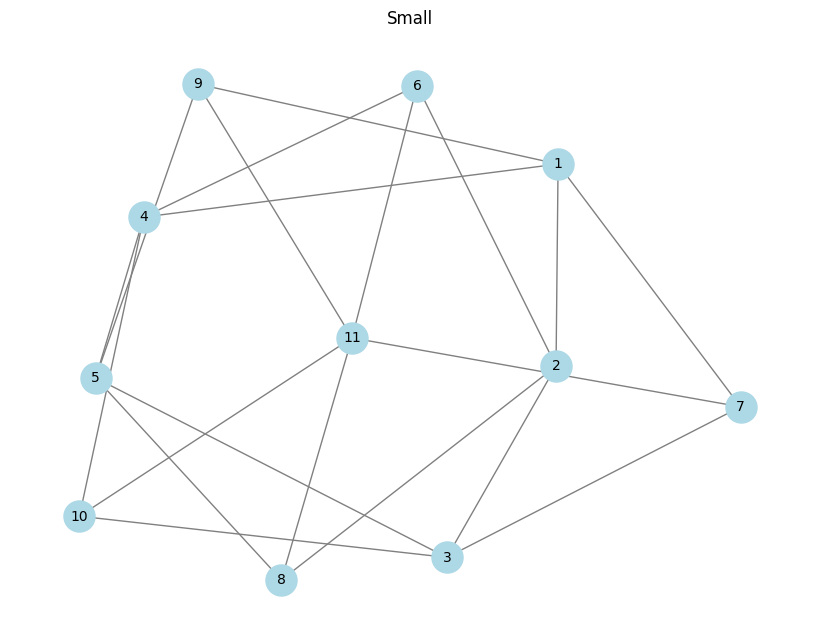

 Cooling Rate  Fitness  Conflicts  Colors
        0.950        4          0       4
        0.990        4          0       4
        0.999        4          0       4


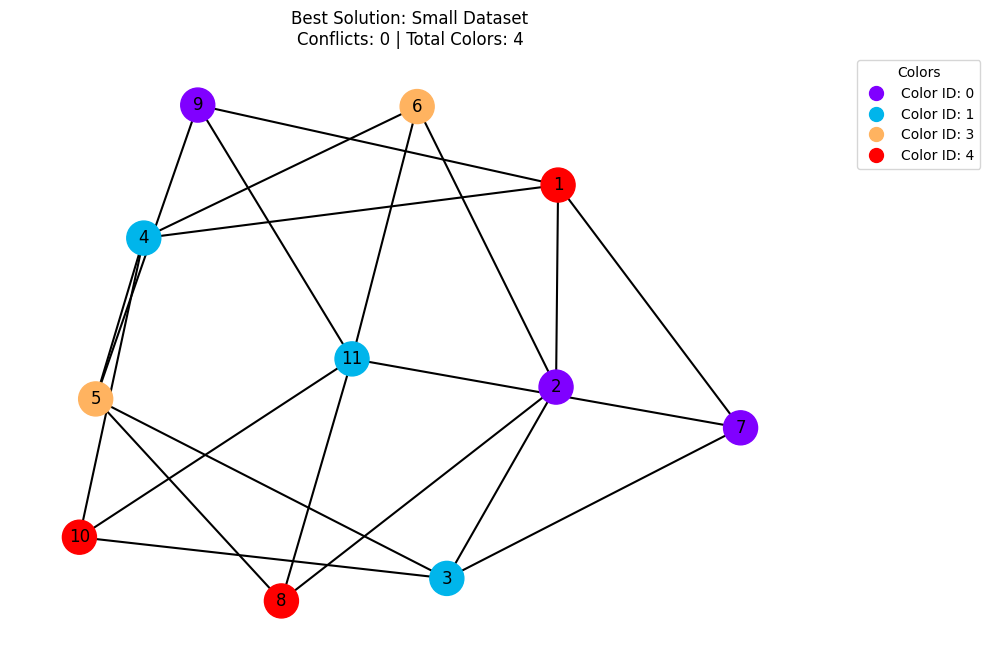

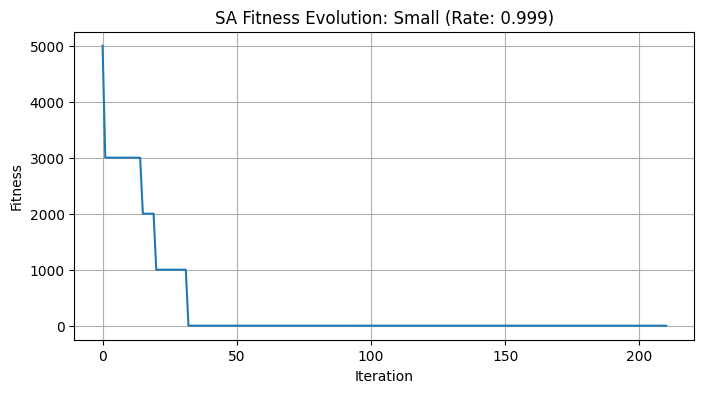


Running Simulated Annealing on Medium Dataset
Medium Graph Loaded
Nodes: 81
Edges: 1056


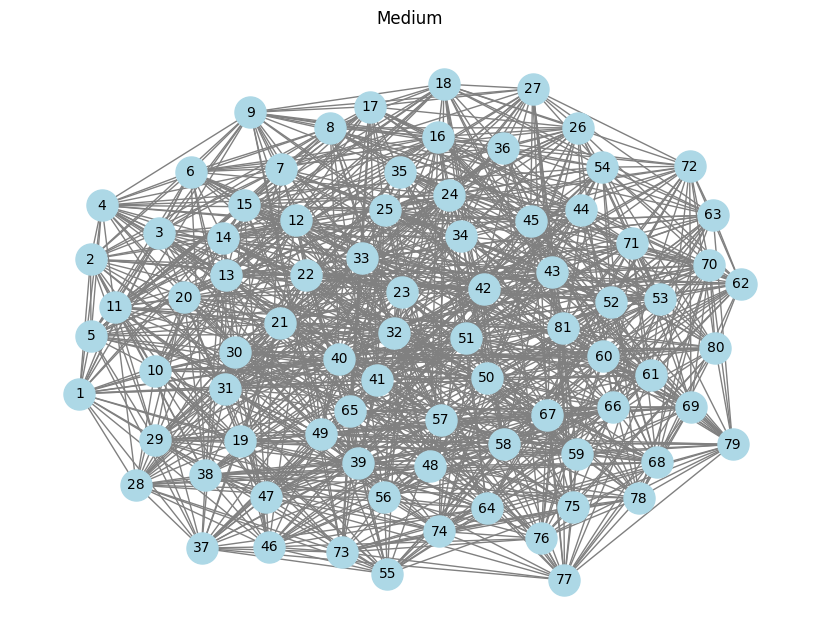

 Cooling Rate  Fitness  Conflicts  Colors
        0.950    23014         23      14
        0.990     3014          3      14
        0.999       14          0      14


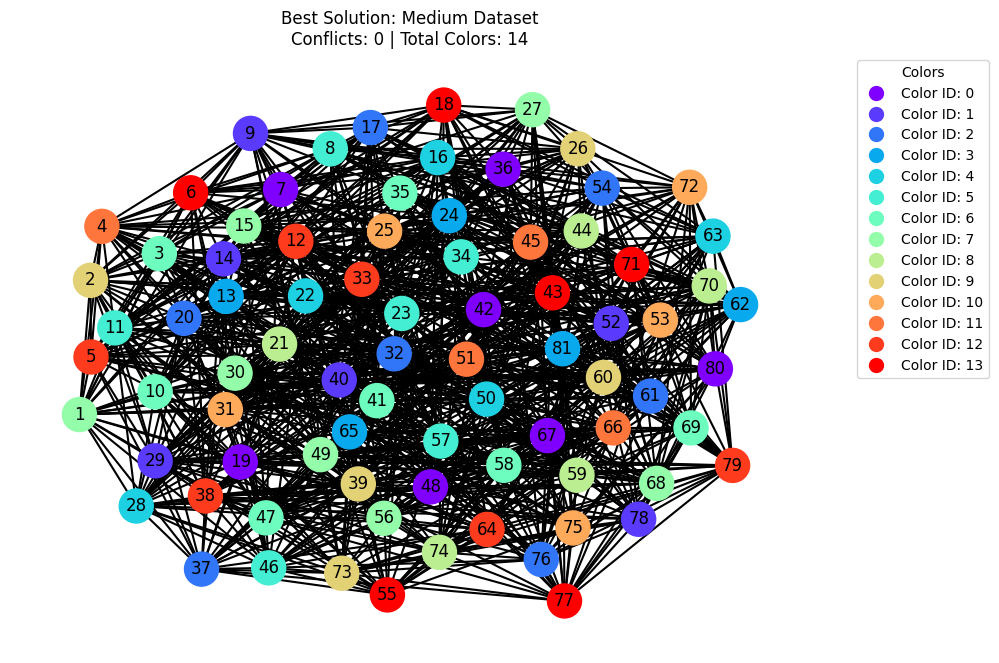

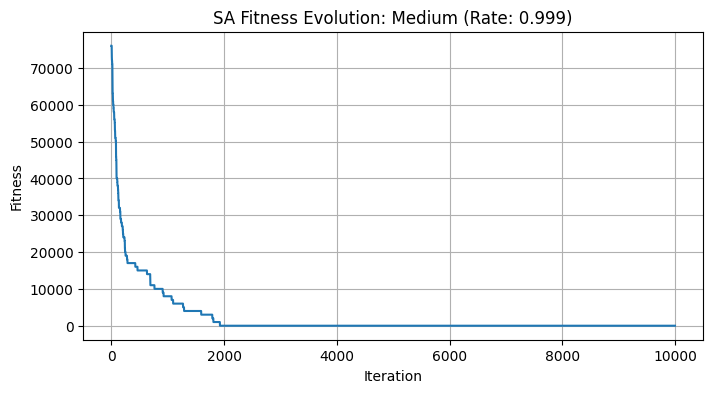


Running Simulated Annealing on Large Dataset
Large Graph Loaded
Nodes: 450
Edges: 8169


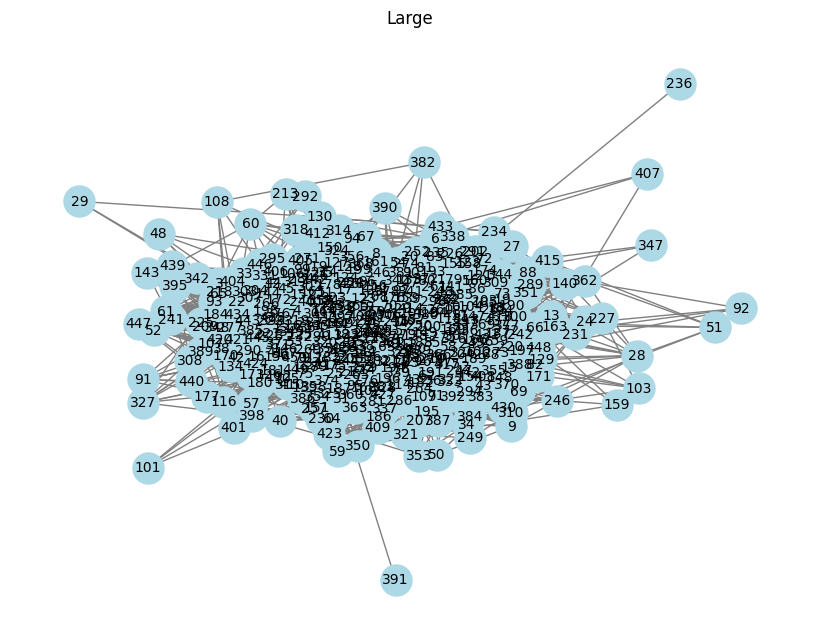

 Cooling Rate  Fitness  Conflicts  Colors
        0.950   258022        258      22
        0.990   127022        127      22
        0.999     7022          7      22


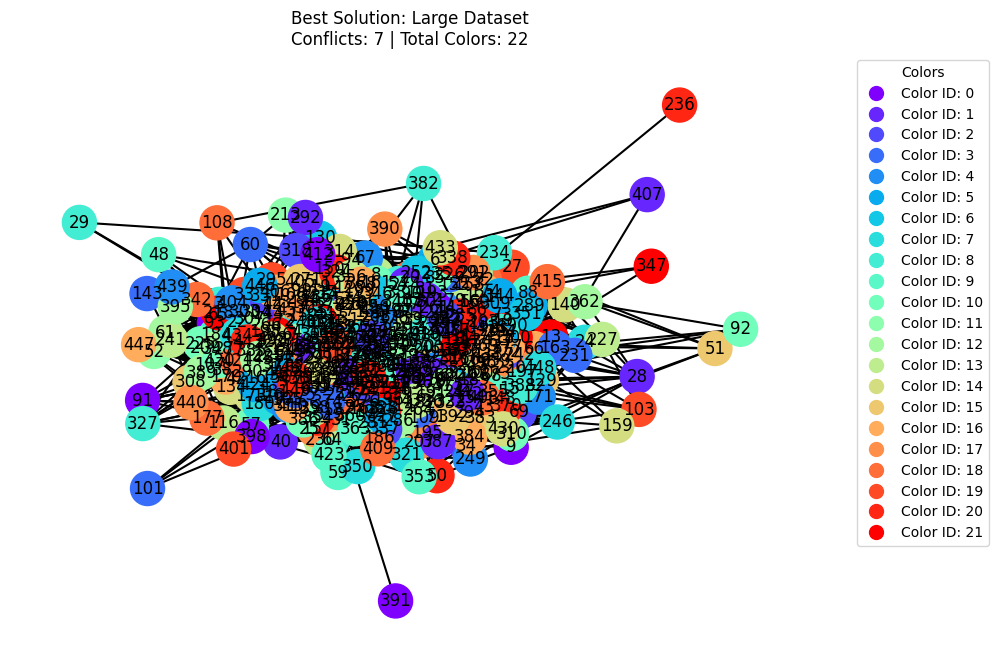

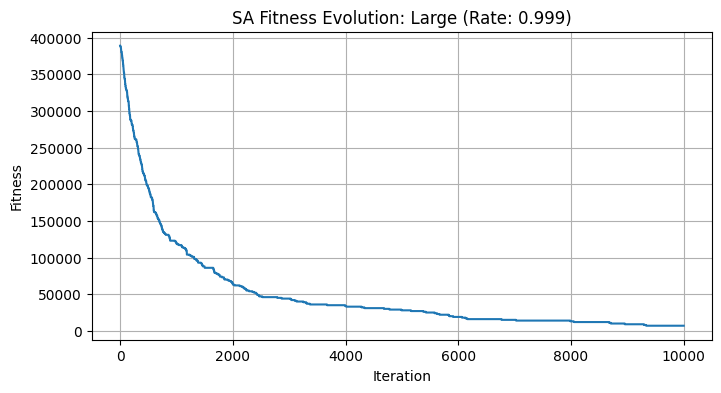

In [18]:
datasets = [
    ("../../data/myciel3.col.txt", "Small"),
    ("../../data/queen9_9.col.txt", "Medium"),
    ("../../data/le450_15b.col.txt", "Large")
]

cooling_rates = [0.95, 0.99, 0.999]

for dataset_path, size_name in datasets:
    print(f"\nRunning Simulated Annealing on {size_name} Dataset")
    graph = loading_graphs(dataset_path, size=size_name)
    plot_graph(graph, title=size_name)

    results_table = []
    best_overall = None
    best_history = None

    for rate in cooling_rates:
        if size_name == "Small":
            max_colors_limit = 5     
        elif size_name == "Medium":
            max_colors_limit = 14
        elif size_name == "Large":
            max_colors_limit = 22
        

        best_ind, history = simulated_annealing(
            graph,
            max_colors=max_colors_limit,
            initial_temp=500.0,
            cooling_rate=rate,
            max_iters=10000)

        results_table.append({
            "Cooling Rate": rate,
            "Fitness": best_ind.fitness,
            "Conflicts": best_ind.conflicts,
            "Colors": best_ind.num_colors_used()
        })

        if best_overall is None or best_ind.fitness < best_overall.fitness:
            best_overall = best_ind
            best_history = history

    df = pd.DataFrame(results_table)
    print(df.to_string(index=False))

    if best_overall:
        plot_colored_graph(graph, best_overall, title=f"Best Solution: {size_name} Dataset")

        plt.figure(figsize=(8, 4))
        plt.plot(best_history)
        plt.title(f"SA Fitness Evolution: {size_name} (Rate: {rate})")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness")
        plt.grid(True)
        plt.show()
